# Part 7 -- LSA

Prepare data for **Singular Value Decomposition (SVD)**.

### Load lib codes:

In [167]:
!pwd

/home/jovyan/work/Portfolio/predicting_stock_market_trends_with_Twitter


In [168]:
from os import chdir
chdir('/home/jovyan/work/Portfolio/predicting_stock_market_trends_with_Twitter/')

from lib import *
from lib.twitter_keys import my_keys
# suppress_warnings()
%matplotlib inline


In [203]:
X = pd.read_pickle('../predicting_stock_market_trends_with_Twitter/data/X.pickle')

In [170]:
# X = X['cleaned_text']

In [172]:
y_le = joblib.load('../predicting_stock_market_trends_with_Twitter/data/y_AAPL_le.pickle')

In [173]:
le = joblib.load('../predicting_stock_market_trends_with_Twitter/data/y_le.transformer')

In [174]:
y_le

array([0, 0, 0, ..., 2, 2, 2])

In [175]:
le

LabelEncoder()

In [176]:
le.classes_

array([array(['down'], dtype=object), array(['neutral'], dtype=object),
       array(['up'], dtype=object)], dtype=object)

SVD does what you tell it to do, so keep components empty so it does it all. PCA does it all and then returns the important ones to you. Generally, you want to use SVD when you have more columns than rows. 

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.externals import joblib

In [204]:
# start = datetime.now()

# tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=20, stop_words='english')
# X_tfidf = tfidf.fit_transform(X['cleaned_text'])

# end = datetime.now()
# print(end - start)

0:00:06.574586


In [208]:
tfidf.get_feature_names()

['00',
 '000',
 '000 jobs',
 '000 people',
 '000 year',
 '02',
 '03',
 '04',
 '05',
 '09',
 '10',
 '10 000',
 '10 cities',
 '10 companies',
 '10 important',
 '10 important things',
 '10 million',
 '10 year',
 '10 years',
 '10 yrs',
 '10 yrs making',
 '100',
 '100 000',
 '100 days',
 '100 million',
 '1000',
 '100m',
 '101',
 '10m',
 '10th',
 '11',
 '11 things',
 '110',
 '111',
 '12',
 '12 weeks',
 '125',
 '13',
 '13 things',
 '13 things common',
 '14',
 '140',
 '15',
 '15 years',
 '150',
 '16',
 '17',
 '17 nate',
 '18',
 '180',
 '1843mag',
 '1843mag archive',
 '19',
 '1990',
 '1999',
 '1b',
 '1b visa',
 '1m',
 '1pm',
 '1st',
 '20',
 '20 000',
 '20 million',
 '20 years',
 '200',
 '2000',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2020',
 '2025',
 '2030',
 '20s',
 '20th',
 '21',
 '21st',
 '21st century',
 '22',
 '23',
 '24',
 '25',
 '25 million',
 '250',
 '26',
 '27',
 '28',
 '29',
 '2nd',
 '30',
 '30 000',
 '30 years',
 '

In [206]:
# joblib.dump(tfidf, '../predicting_stock_market_trends_with_Twitter/data/tfidf.pickle')

['../predicting_stock_market_trends_with_Twitter/data/tfidf.pickle']

In [7]:
# type(X_tfidf)

scipy.sparse.csr.csr_matrix

In [12]:
# joblib.dump(X_tfidf, '../predicting_stock_market_trends_with_Twitter/data/X_tfidf_transformer.pickle')

['../predicting_stock_market_trends_with_Twitter/data/X_tfidf_transformer.pickle']

In [137]:
X_tfidf = joblib.load('../predicting_stock_market_trends_with_Twitter/data/X_tfidf_transformer.pickle')

### Explore TFIDF vectors

In [138]:
tfidf.get_feature_names()[-10:]

['yrs making new',
 'ytd',
 'yup',
 'zachbraff',
 'zealand',
 'zelda',
 'zero',
 'zika',
 'zone',
 'zuckerberg']

### Do an SVD with a lot of n_components to see how many you want to assign later:
Here, we are going to use SVD to reduce the dimensionality to 50 dimensions first, and then use another dimensionality reduction technique called t-SNE that is particularly suited to visualizing high-dimensional datasets, to further reduce the dimensionality to 2.

In [199]:
from sklearn.decomposition import PCA

In [140]:
# X_tfidf.shape

(68006, 5268)

In [141]:
X_tfidf_10000 = X_tfidf[:10000]

In [142]:
# type(X_tfidf_10000)

scipy.sparse.csr.csr_matrix

In [143]:
X_tfidf_10000 = X_tfidf_10000.todense()

In [110]:
# joblib.dump(X_tfidf_10000, '../predicting_stock_market_trends_with_Twitter/data/X_tfidf_10000.pickle')

['../predicting_stock_market_trends_with_Twitter/data/X_tfidf_10000.pickle']

In [200]:
PCA = PCA(n_components = 50, random_state=42)
PCA_tfidf = PCA.fit_transform(X_tfidf.todense())

In [105]:
joblib.dump(PCA_tfidf, '../predicting_stock_market_trends_with_Twitter/data/PCA_tfidf.pickle')

['../predicting_stock_market_trends_with_Twitter/data/PCA_tfidf.pickle']

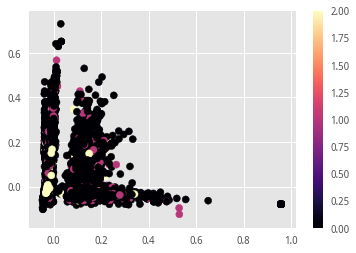

In [201]:
plt.scatter(PCA_tfidf.T[0], PCA_tfidf.T[1], c=y_le, cmap='magma')
plt.colorbar()

In [150]:
PCA = PCA(n_components = 50, random_state=42)
PCA_tfidf_10000 = PCA.fit_transform(X_tfidf_10000)

In [117]:
# joblib.dump(PCA_tfidf_10000, '../predicting_stock_market_trends_with_Twitter/data/PCA_tfidf_10000.pickle')

['../predicting_stock_market_trends_with_Twitter/data/PCA_tfidf_10000.pickle']

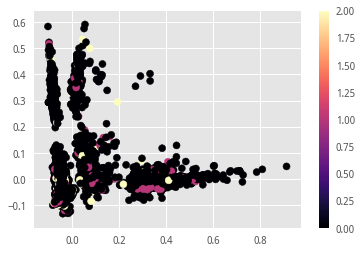

In [154]:
plt.scatter(PCA_tfidf_10000.T[0], PCA_tfidf_10000.T[1], c=y_le[:10000], cmap='magma')
plt.colorbar()

In [191]:
y_le

array([0, 0, 0, ..., 2, 2, 2])

In [190]:
le.inverse_transform(y_le)

array([array(['down'], dtype=object), array(['down'], dtype=object),
       array(['down'], dtype=object), ..., array(['up'], dtype=object),
       array(['up'], dtype=object), array(['up'], dtype=object)], dtype=object)

In [186]:
le.classes_

array([array(['down'], dtype=object), array(['neutral'], dtype=object),
       array(['up'], dtype=object)], dtype=object)

In [212]:
SVD = TruncatedSVD(n_components = 50, random_state=42)

In [211]:
SVD_tfidf = SVD.fit_transform(X_tfidf.todense())

In [86]:
joblib.dump(SVD_tfidf, '../predicting_stock_market_trends_with_Twitter/data/SVD_tfidf.pickle')

['../predicting_stock_market_trends_with_Twitter/data/SVD_tfidf.pickle']

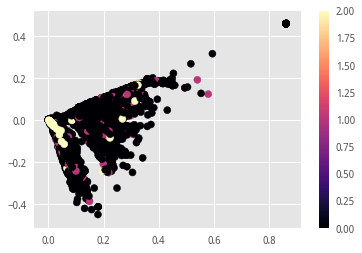

In [193]:
plt.scatter(SVD_tfidf.T[0], SVD_tfidf.T[1], c=y_le, cmap='magma')
plt.colorbar()

In [195]:
SVD_tfidf_10000 = SVD.fit_transform(X_tfidf[:10000])

In [89]:
joblib.dump(SVD_tfidf_10000, '../predicting_stock_market_trends_with_Twitter/data/SVD_tfidf_10000.pickle')

['../predicting_stock_market_trends_with_Twitter/data/SVD_tfidf_10000.pickle']

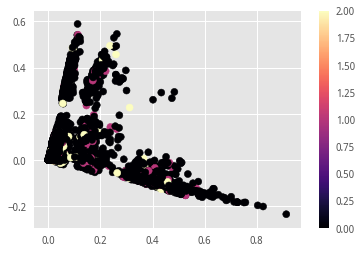

In [197]:
plt.scatter(SVD_tfidf_10000.T[0], SVD_tfidf_10000.T[1], c=y_le[:10000], cmap='magma')
plt.colorbar()

(0, 0.02)

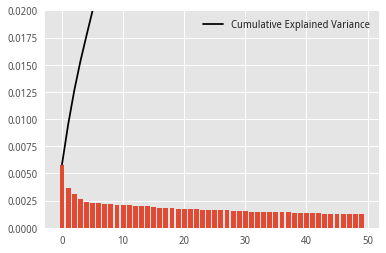

In [62]:
# x = list(range(len(PCA.explained_variance_ratio_)))
# plt.plot(x, np.cumsum(PCA.explained_variance_ratio_), label='Cumulative Explained Variance', color='black')
# plt.bar(x, PCA.explained_variance_ratio_)
# plt.legend()
# plt.ylim(0,.02)
# # plt.xlim(-100,4000)

# TOPIC MODELING

Split data into 3 categories, do tfidf seperately, PCA on tfidf, pca_components --> to find the topics (top words) in each of them

In [ ]:
pca_variance function

np.argmax(pca_3.components_[2])
output = 36

X.columns[36] 
output = 'dept_4' --> groceries

OR TRY zip column_names:
1. ZIP STUFF:
    L = list(zip(pca.components_[0], column_names))
2. SORT STUFF:
    sort(L, key=lambda x: x[1])

(0, 0.02)

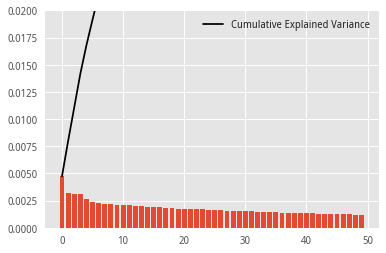

In [63]:
# x = list(range(len(SVD.explained_variance_ratio_)))
# plt.plot(x, np.cumsum(SVD.explained_variance_ratio_), label='Cumulative Explained Variance', color='black')
# plt.bar(x, SVD.explained_variance_ratio_)
# plt.legend()
# plt.ylim(0,.02)
# # plt.xlim(-100,4000)

In [48]:
# np.cumsum(PCA.explained_variance_ratio_)

array([ 0.00582138,  0.00946974,  0.01260373,  0.01528474,  0.01765842,
        0.01996988,  0.022273  ,  0.02447057,  0.02662678,  0.02875104,
        0.03085526,  0.0329165 ,  0.03490785,  0.03687907,  0.03883909,
        0.04077048,  0.04263293,  0.04445822,  0.04626556,  0.04802565,
        0.04977663,  0.05150371,  0.05320916,  0.05488228,  0.05654336,
        0.05820058,  0.05983683,  0.0614369 ,  0.06301206,  0.06456031,
        0.06608598,  0.06759358,  0.06909727,  0.07059266,  0.07207502,
        0.07354405,  0.07498499,  0.07641411,  0.07781693,  0.07920816,
        0.08057334,  0.08193026,  0.08327886,  0.08462004,  0.08594354,
        0.08726069,  0.08857409,  0.08987867,  0.09117529,  0.09246279,
        0.09373832,  0.09500969,  0.09627437,  0.09753642,  0.09879641,
        0.10003533,  0.10126902,  0.10248622,  0.1036982 ,  0.10490238,
        0.10608847,  0.10726719,  0.10843979,  0.10960251,  0.11075749,
        0.11190557,  0.11304554,  0.11417629,  0.11530171,  0.11

In [41]:
# np.cumsum(SVD.explained_variance_ratio_)

array([ 0.00473831,  0.00797087,  0.01106099,  0.01416196,  0.01679716,
        0.01915054,  0.02145472,  0.02366732,  0.02583391,  0.02796623,
        0.03007116,  0.03215208,  0.03414543,  0.03611682,  0.03807729,
        0.04000815,  0.04189375,  0.04373651,  0.04554684,  0.04730044,
        0.04904979,  0.05079186,  0.0525183 ,  0.05421246,  0.05588476,
        0.05754203,  0.05917822,  0.0607708 ,  0.06236665,  0.06393567,
        0.06548315,  0.06700504,  0.06851008,  0.07000825,  0.07149092,
        0.0729603 ,  0.07440765,  0.07583667,  0.07723781,  0.07863499,
        0.07999862,  0.0813622 ,  0.08271517,  0.0840634 ,  0.08539827,
        0.08671815,  0.08803281,  0.08934505,  0.09064466,  0.09193495,
        0.09321146,  0.09448333,  0.09574899,  0.09701166,  0.09827194,
        0.09951493,  0.10074896,  0.1019685 ,  0.10318043,  0.10438352,
        0.10557568,  0.10676011,  0.10793336,  0.10910161,  0.11025896,
        0.11141095,  0.11254969,  0.11368098,  0.11480515,  0.11

<s>With 100 SVD n_components, we can only account for 6% of the variance in the data. We need more. 
With 300 SVD n_components, we can only account for 11% of the variance in the data. **Go back and clean data to see if we get better?**</s><br>
With 300 SVD n_components, we can account for 29% of the variance in the data.
With 200 SVD n_components, we can account for 22% of the variance in the data. 

In [16]:
# def perform_latent_semantic_analysis(n_components, vectorizer):
#     SVD = TruncatedSVD(n_components)
#     component_names = ["component_"+str(i+1) for i in range(n_components)]
#     latent_semantic_analysis = pd.DataFrame(SVD.fit_transform(X_tfidf),
#                                             index = X['cleaned_text'].index,
#                                             columns = component_names)
#     vocabulary_expression = pd.DataFrame(SVD.components_,
#                                          index = component_names,
#                                          columns = vectorizer.get_feature_names())
#     return latent_semantic_analysis, vocabulary_expression

In [48]:
# latent_semantic_analysis, vocabulary_expression = perform_latent_semantic_analysis(3, tfidf)

In [19]:
# latent_semantic_analysis['text'] = X['cleaned_text']
# latent_semantic_analysis['class'] = y_le

In [21]:
# latent_semantic_analysis.sample(10)

,component_1,component_2,component_3,text,class
25103,0.036475,-0.046663,-0.075772,catch up on last week s episode of the equity ...,0
83903,0.007324,-0.008988,-0.007981,ft alphaville guest post why iea scenarios sho...,0
10048,0.036565,-0.043457,-0.023255,jamie oliver about to take stage i think you c...,1
70859,0.013713,-0.020004,-0.018284,this thai startup wants to turn its users into...,0
71966,0.010914,-0.014483,-0.018904,13 beauty products or services that are worth ...,0
34303,0.075677,-0.090003,-0.140216,we re taking a completely new approach to abus...,0
6993,0.017279,-0.027260,-0.010049,economic growth doesn t always improve well be...,0
4611,0.195292,-0.116383,0.178553,rt cnnpolitics president trump on the job repo...,0
56381,0.008814,-0.012495,-0.010974,imagine a stored value card so thin it could b...,0
33389,0.264698,0.135462,0.018691,rt jayleno the tonightshow with guests jerryse...,0


In [22]:
# vocabulary_expression.abs().T.sort_values('component_1', ascending=False).head(10)

,component_1,component_2,component_3
rt,0.861678,0.457639,0.097134
trump,0.180524,0.414735,0.531287
new,0.096028,0.176435,0.314188
president,0.093651,0.303586,0.190468
just,0.087007,0.159127,0.147654
amp,0.085620,0.070823,0.153974
today,0.073437,0.097643,0.141319
people,0.066038,0.123703,0.118793
time,0.066005,0.111455,0.153944
like,0.063773,0.100056,0.146415


In [18]:
!pip install bhtsne

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


To visualize the word embedding in two dimensions, we need to choose a dimensionality reduction technique to use. t-SNE optimizes for keeping points close to their neighbors, so it is the natural tool if we want to visualize which words are close together in our word embedding.

In [19]:
from bhtsne import tsne

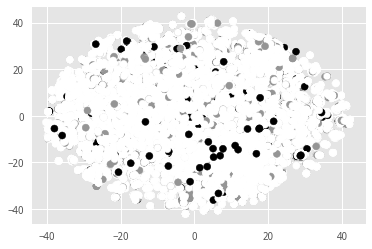

In [117]:
# # Fit on SVD_X_tfidf.data:
# TSNE_SVD_tfidf = tsne(SVD_tfidf.data)
# plt.scatter(TSNE_SVD_tfidf[:, 0], TSNE_SVD_tfidf[:, 1], c=y_le)
# plt.show()

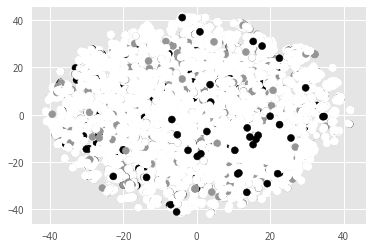

0:22:41.994196


In [81]:
# start = datetime.now()

# # Fit on SVD_tfidf:
# TSNE_SVD_tfidf = tsne(SVD_tfidf)
# plt.scatter(TSNE_SVD_tfidf[:, 0], TSNE_SVD_tfidf[:, 1], c=y_le)
# plt.show()

# end = datetime.now()
# print(end - start)

In [83]:
joblib.dump(TSNE_SVD_tfidf, '../predicting_stock_market_trends_with_Twitter/data/TSNE_SVD_tfidf.pickle')

['../predicting_stock_market_trends_with_Twitter/data/TSNE_SVD_tfidf.pickle']

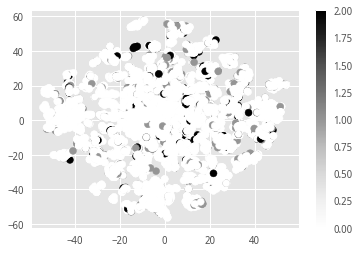

0:01:47.711465


In [24]:
# start = datetime.now()

# # Fit on SVD_X_tfidf:
# TSNE_SVD_tfidf = tsne(SVD_tfidf)
# plt.scatter(TSNE_SVD_tfidf[:, 0], TSNE_SVD_tfidf[:, 1], c=y_le[:10000])
# plt.colorbar()
# plt.show()

# end = datetime.now()
# print(end - start)

In [38]:
type(X_tfidf.data)

numpy.ndarray

In [215]:
from bhtsne import tsne

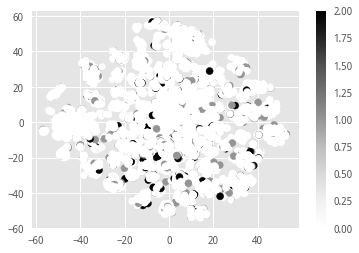

0:01:41.965286


In [217]:
start = datetime.now()

# Fit on SVD_X_tfidf[:10000].data:
TSNE_SVD_tfidf_10000 = tsne(SVD_tfidf_10000, dimensions=2, rand_seed=42)
plt.scatter(TSNE_SVD_tfidf_10000[:, 0], TSNE_SVD_tfidf_10000[:, 1], c=y_le[:10000])
plt.colorbar()
plt.show()

end = datetime.now()
print(end - start)

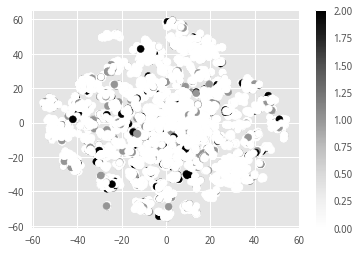

0:01:43.553808


In [84]:
# start = datetime.now()

# # Fit on SVD_X_tfidf[:10000].data:
# TSNE_SVD_tfidf_10000 = tsne(SVD_tfidf_10000)
# plt.scatter(TSNE_SVD_tfidf_10000[:, 0], TSNE_SVD_tfidf_10000[:, 1], c=y_le[:10000])
# plt.colorbar()
# plt.show()

# end = datetime.now()
# print(end - start)

In [218]:
joblib.dump(TSNE_SVD_tfidf_10000, '../predicting_stock_market_trends_with_Twitter/data/TSNE_SVD_tfidf_10000.pickle')

['../predicting_stock_market_trends_with_Twitter/data/TSNE_SVD_tfidf_10000.pickle']